<h1>Zomato Data Analysis

<h3>__Importing necessary libraries__


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<h3>Read the top 5 items

In [5]:
data=pd.read_csv("Zomato data .csv")

In [6]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


<h3>Remove the denominator and convert to float

In [10]:
def handle_rate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
data['rate']=data['rate'].apply(handle_rate)
data.head()
    

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<h3> Summary of the data

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [12]:
data.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


<h3> Type of Restaurant VS Count

Text(0.5, 0, 'Type of restaurant')

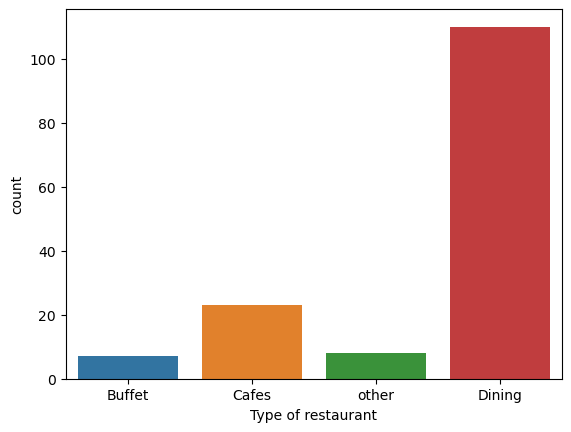

In [15]:
sns.countplot(x=data['listed_in(type)'])
plt.xlabel("Type of restaurant")

<h3> Type of Restaurant VS Votes

Text(0, 0.5, 'Votes')

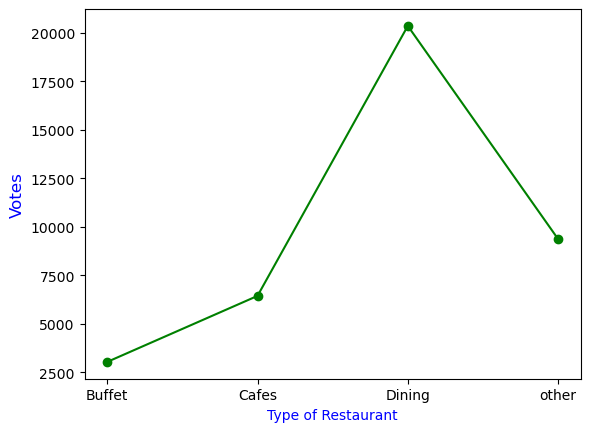

In [24]:
grouped_data=data.groupby("listed_in(type)")['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c="green",marker="o")
plt.xlabel("Type of Restaurant",c="blue",size=10)
plt.ylabel("Votes",c="blue",size=12)


<h3> Restaurant with max votes

In [28]:
max_votes=data['votes'].max()
restaurant_max_vote=data.loc[data['votes']==max_votes,'name']

print("Restaurants with max votes are:")
print(restaurant_max_vote)

Restaurants with max votes are:
38    Empire Restaurant
Name: name, dtype: object


<h3>Online VS offline orders

<Axes: xlabel='online_order', ylabel='count'>

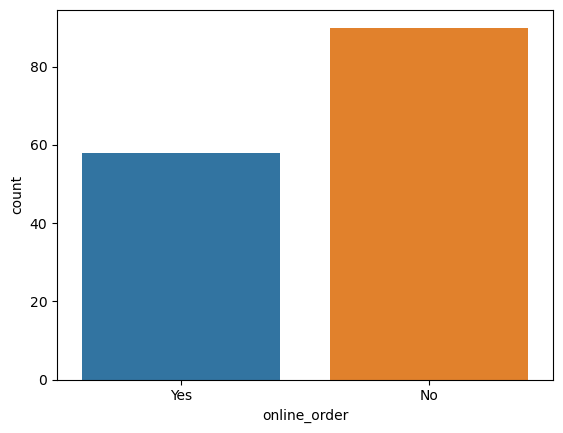

In [31]:
sns.countplot(x=data["online_order"])

<h3> Distribution of Ratings

Text(0.5, 1.0, 'Ratings Distributions')

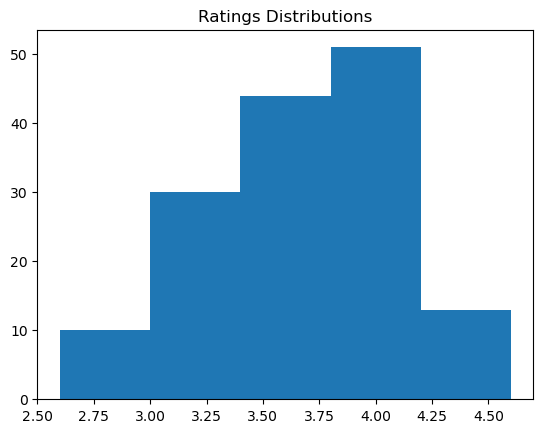

In [35]:
plt.hist(data["rate"],bins=5)
plt.title("Ratings Distributions")


<h3> Approximate cost for two people

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

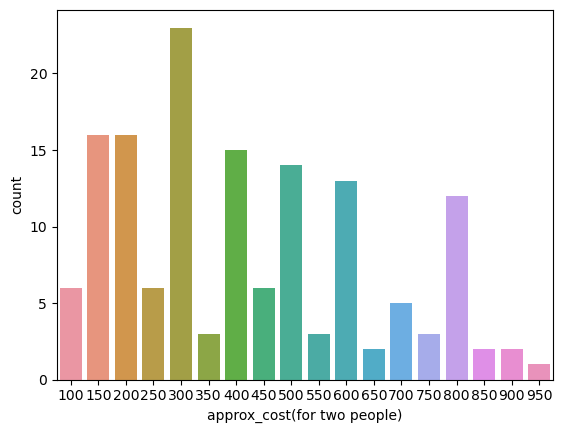

In [38]:
couple_data=data["approx_cost(for two people)"]
sns.countplot(x=couple_data)

<h3> Ratings- Online VS Offline

<Axes: xlabel='online_order', ylabel='rate'>

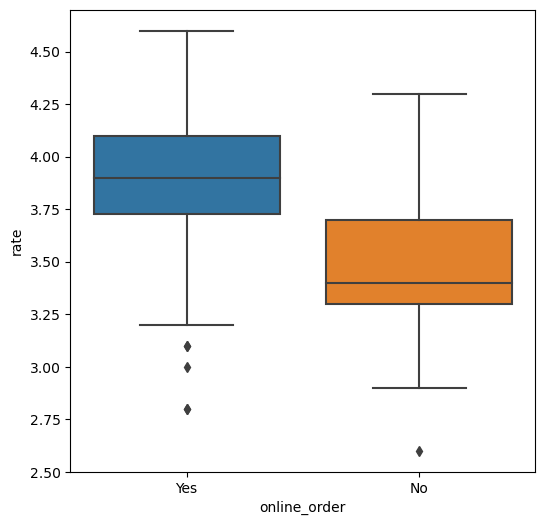

In [44]:
plt.figure(figsize=(6,6))
sns.boxplot(x="online_order",y="rate",data=data)

<h3> Pivot table

<Axes: xlabel='online_order', ylabel='listed_in(type)'>

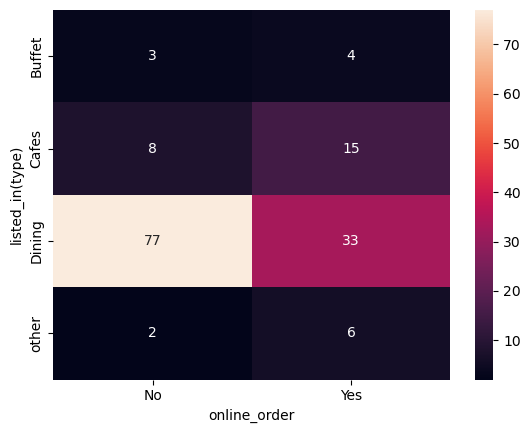

In [48]:
pivot_table=data.pivot_table(index="listed_in(type)",columns="online_order",aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True)